# Miles to Kilometers ML Model

The main equation for converting miles to kilometers is as follows:

**kilometers = miles × 1.60934**


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# data to convert miles to kilometers
miles_q = np.array([1, 5, 10, 25, 50, 100], dtype=float)
km_a = np.array([1.60934, 8.0467, 16.0934, 40.2355, 80.467, 160.934], dtype=float)

#display reference
for i,c in enumerate(miles_q):
  print(f"{c} miles = {km_a[i]} kilometers".format(c, km_a[i]))

1.0 miles = 1.60934 kilometers
5.0 miles = 8.0467 kilometers
10.0 miles = 16.0934 kilometers
25.0 miles = 40.2355 kilometers
50.0 miles = 80.467 kilometers
100.0 miles = 160.934 kilometers


In [3]:
# make nerual network with one neuron

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(
  loss='mean_squared_error',
  optimizer=tf.keras.optimizers.Adam(0.1)
)

history = model.fit(miles_q, km_a, epochs=500, verbose=False)
print("Finished training the model")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished training the model


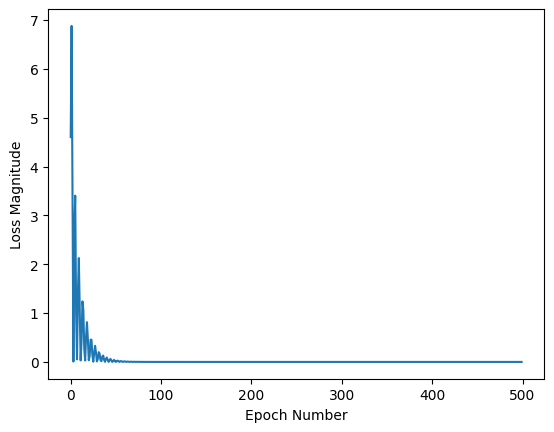

In [4]:
#plotting the training loss
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

In [7]:
# Testing for new input
print(f"Prediction for 70 miles: {model.predict(np.array([70.0]))}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction for 70 miles: [[112.65406]]


In [8]:
layer = model.layers[0]
print(f"Learned weight and bias: {layer.get_weights()}")

Learned weight and bias: [array([[1.609338]], dtype=float32), array([0.00039369], dtype=float32)]


The Learned weight for the equations is 1.609338
Compared to the actual value of 1.60934 that is needed to calculate accuately the converstion.

With further training the model will most likely approach the exact value.